In [ ]:
import cv2

cap = cv2.VideoCapture("videoplayback.mp4")


if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

print("Video loaded successfully.")


Video loaded successfully.


In [ ]:
import os

frame_folder = '/content/iva1'
os.makedirs(frame_folder, exist_ok=True)

frame_number = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_filename = os.path.join(frame_folder, f'frame_{frame_number:04d}.jpg')
    cv2.imwrite(frame_filename, frame)
    frame_number += 1

cap.release()
cv2.destroyAllWindows()

print("Frame extraction completed.")

Frame extraction completed.
Frame extraction completed.


In [9]:
def segment_frame(frame):

    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    lower_bound = (0, 100, 100)
    upper_bound = (179, 255, 255)
    mask = cv2.inRange(hsv, lower_bound, upper_bound)
    return mask

segmentation_folder = '/content/segment'
os.makedirs(segmentation_folder, exist_ok=True)

cap = cv2.VideoCapture("videoplayback.mp4")
frame_number = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    segmented_frame = segment_frame(frame)
    segmentation_filename = os.path.join(segmentation_folder, f'segmented_{frame_number:04d}.jpg')
    cv2.imwrite(segmentation_filename, segmented_frame)
    frame_number += 1

cap.release()
cv2.destroyAllWindows()

print("Spatio-temporal segmentation completed.")



Spatio-temporal segmentation completed.


In [10]:
import numpy as np

def detect_scene_cut(frame, prev_frame, threshold=30):
    if prev_frame is None:
        return False
    diff = cv2.absdiff(frame, prev_frame)
    non_zero_count = np.count_nonzero(diff)
    return non_zero_count > threshold

scene_cut_folder = '/content/iva1'
os.makedirs(scene_cut_folder, exist_ok=True)

cap = cv2.VideoCapture("videoplayback.mp4")
frame_number = 0
prev_frame = None

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    if detect_scene_cut(frame, prev_frame):
        scene_cut_filename = os.path.join(scene_cut_folder, f'scene_cut_{frame_number:04d}.jpg')
        cv2.imwrite(scene_cut_filename, frame)

    prev_frame = frame
    frame_number += 1

cap.release()
cv2.destroyAllWindows()

print("Scene cut detection completed.")


Scene cut detection completed.


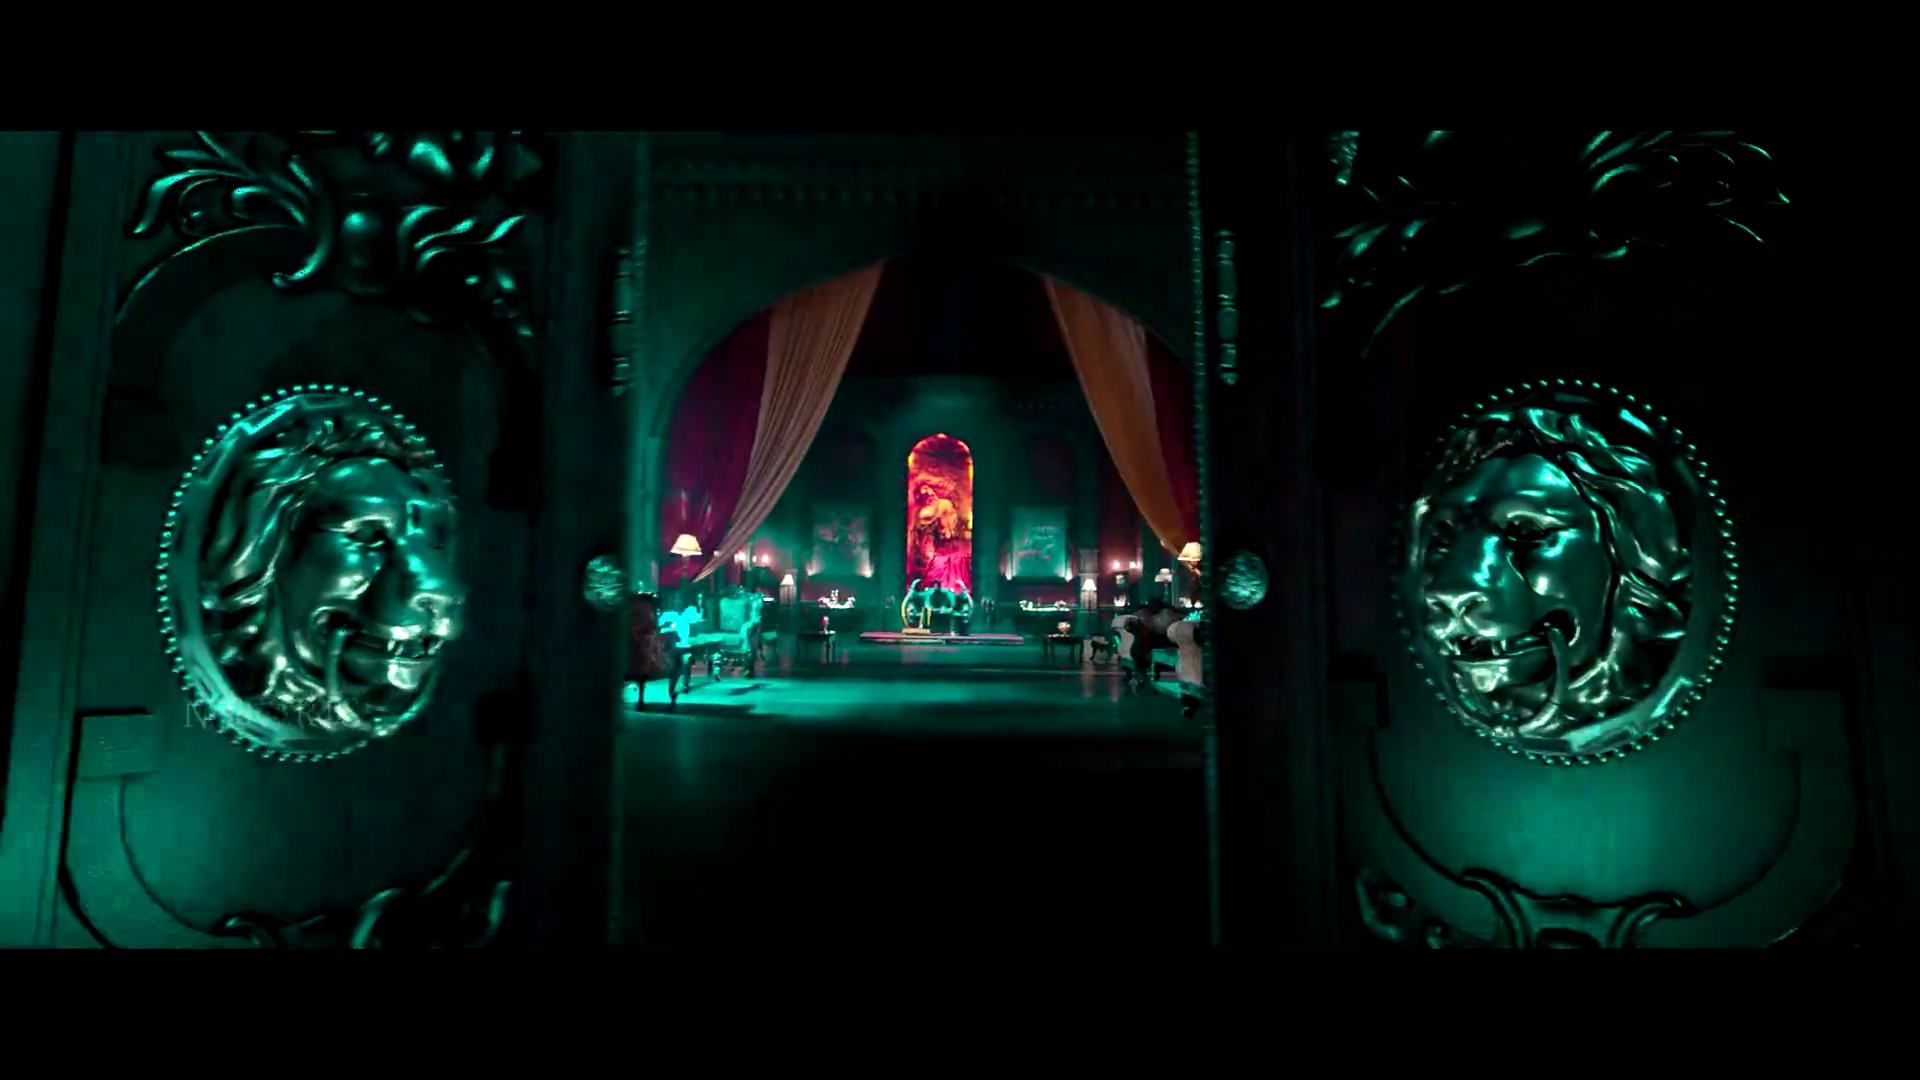

Scene cut at frame: 89


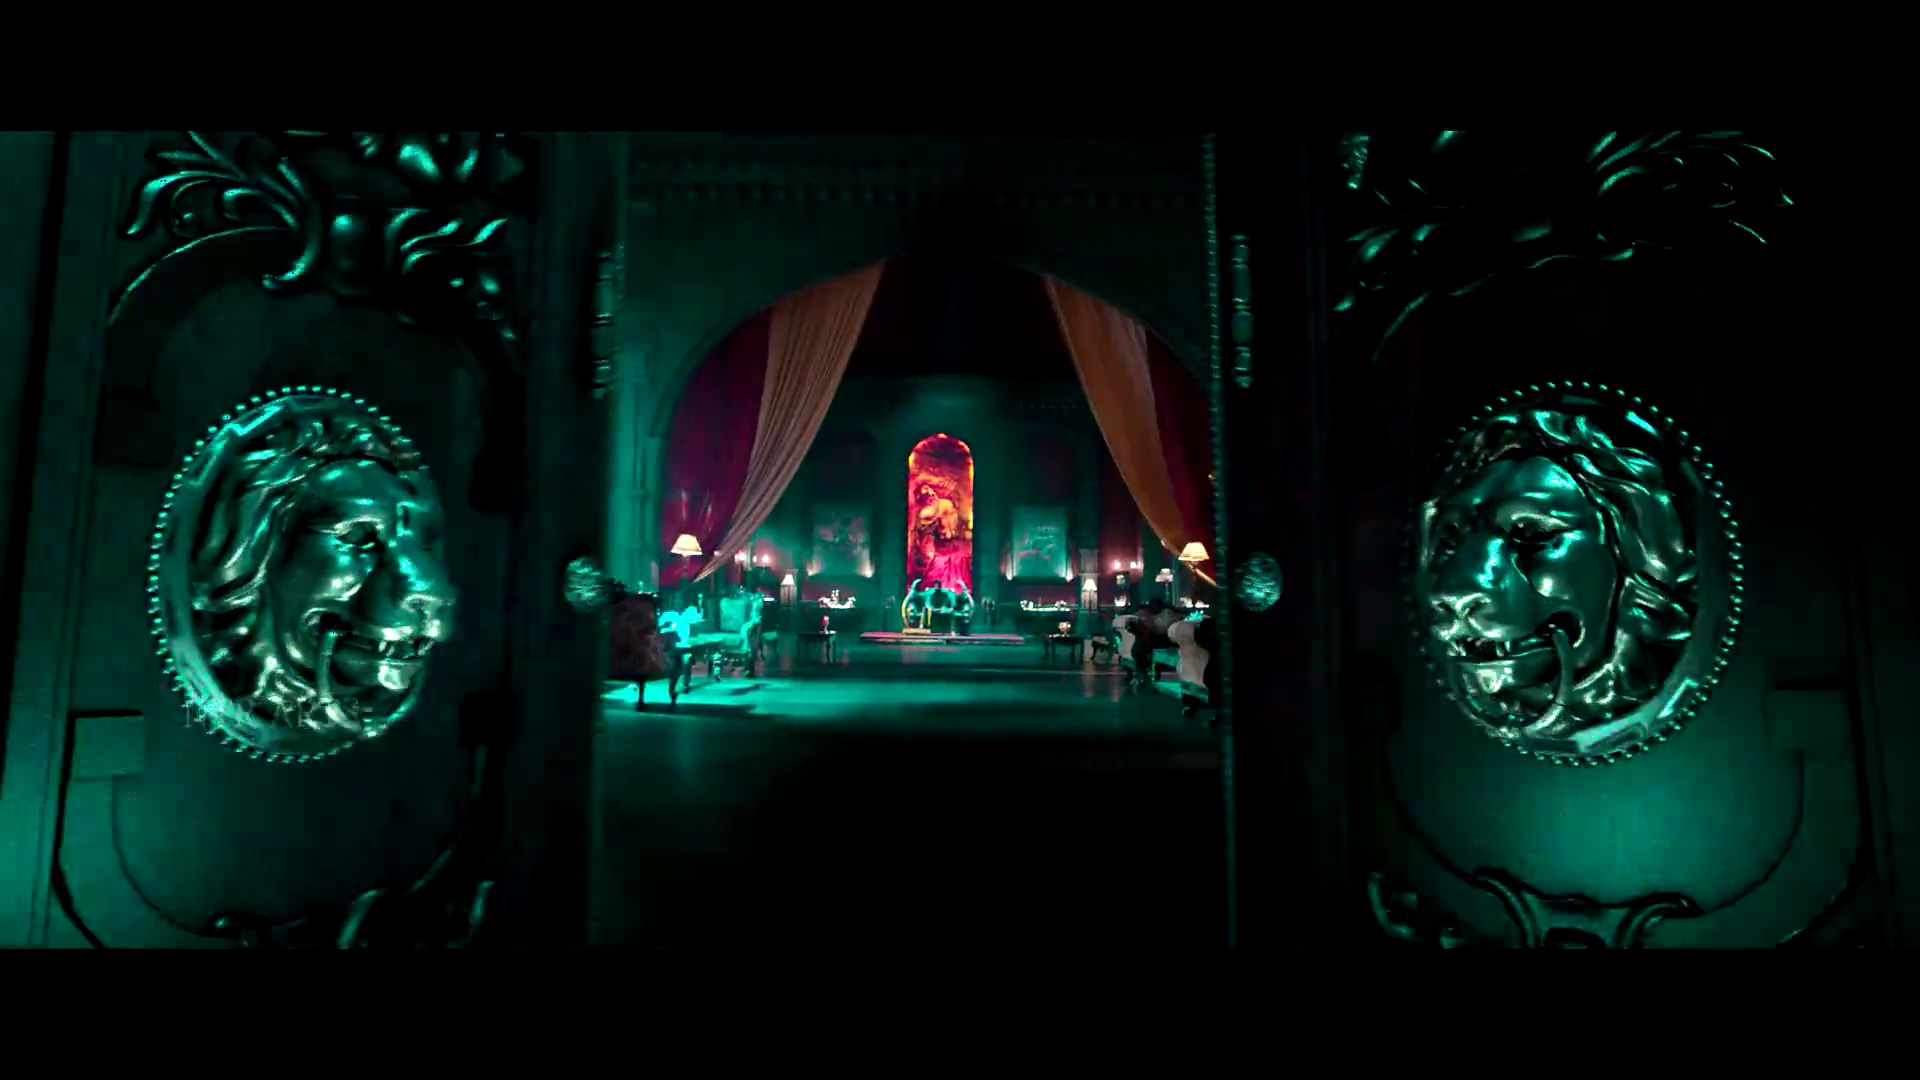

Scene cut at frame: 90


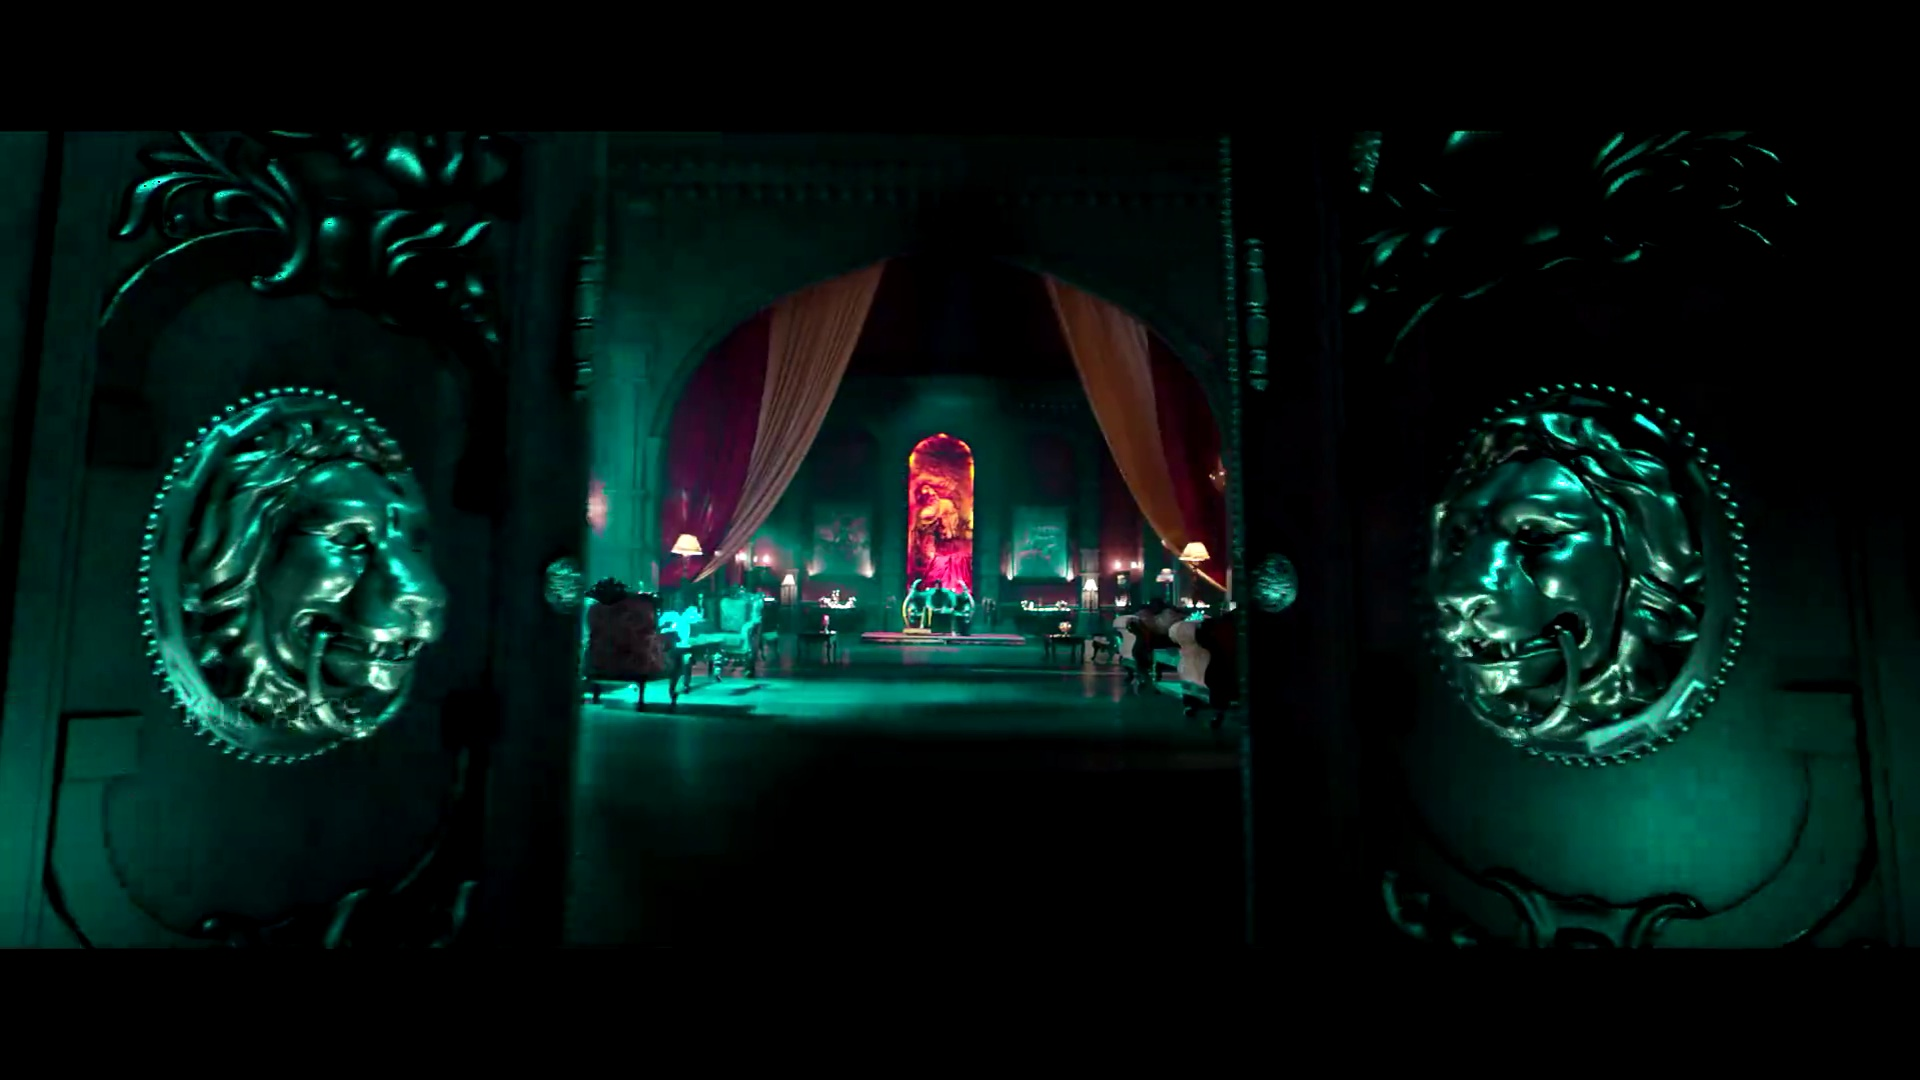

Scene cut at frame: 91


Scene cut at frame: 92


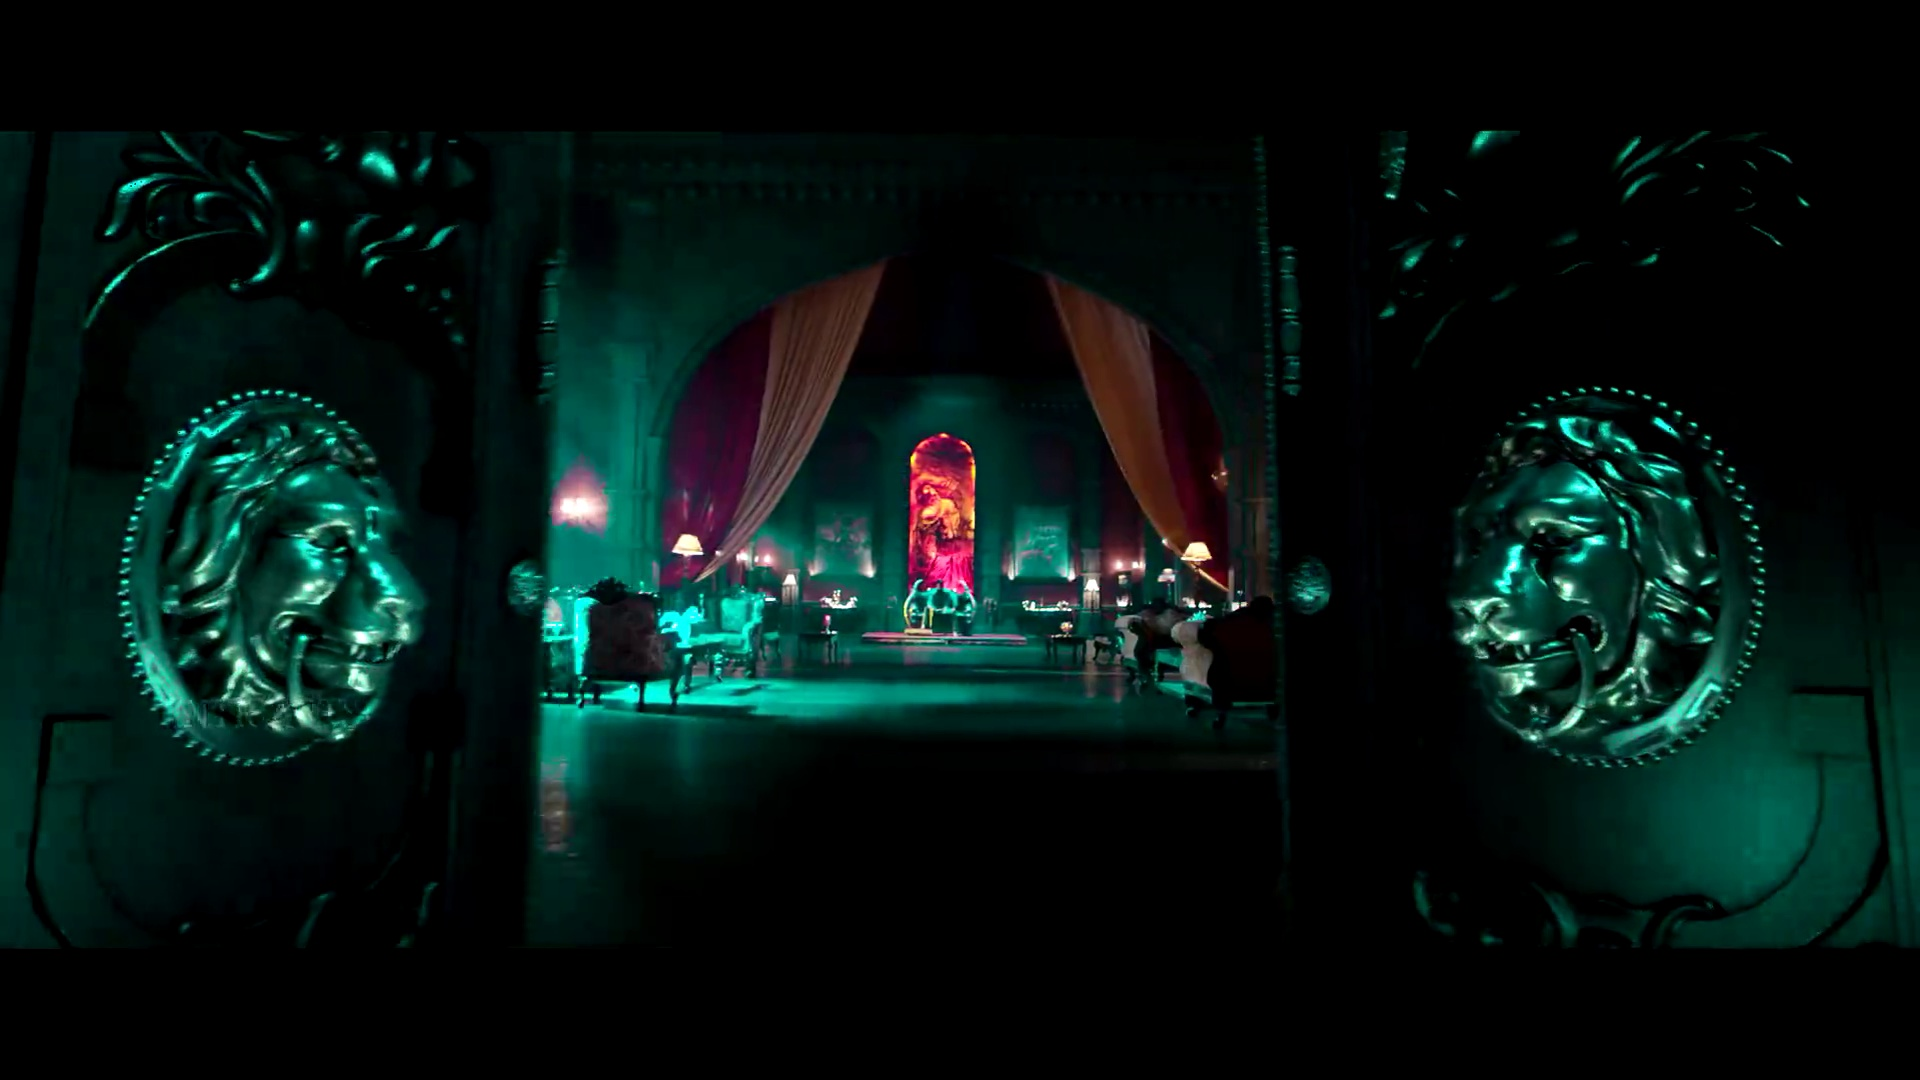

Scene cut at frame: 93


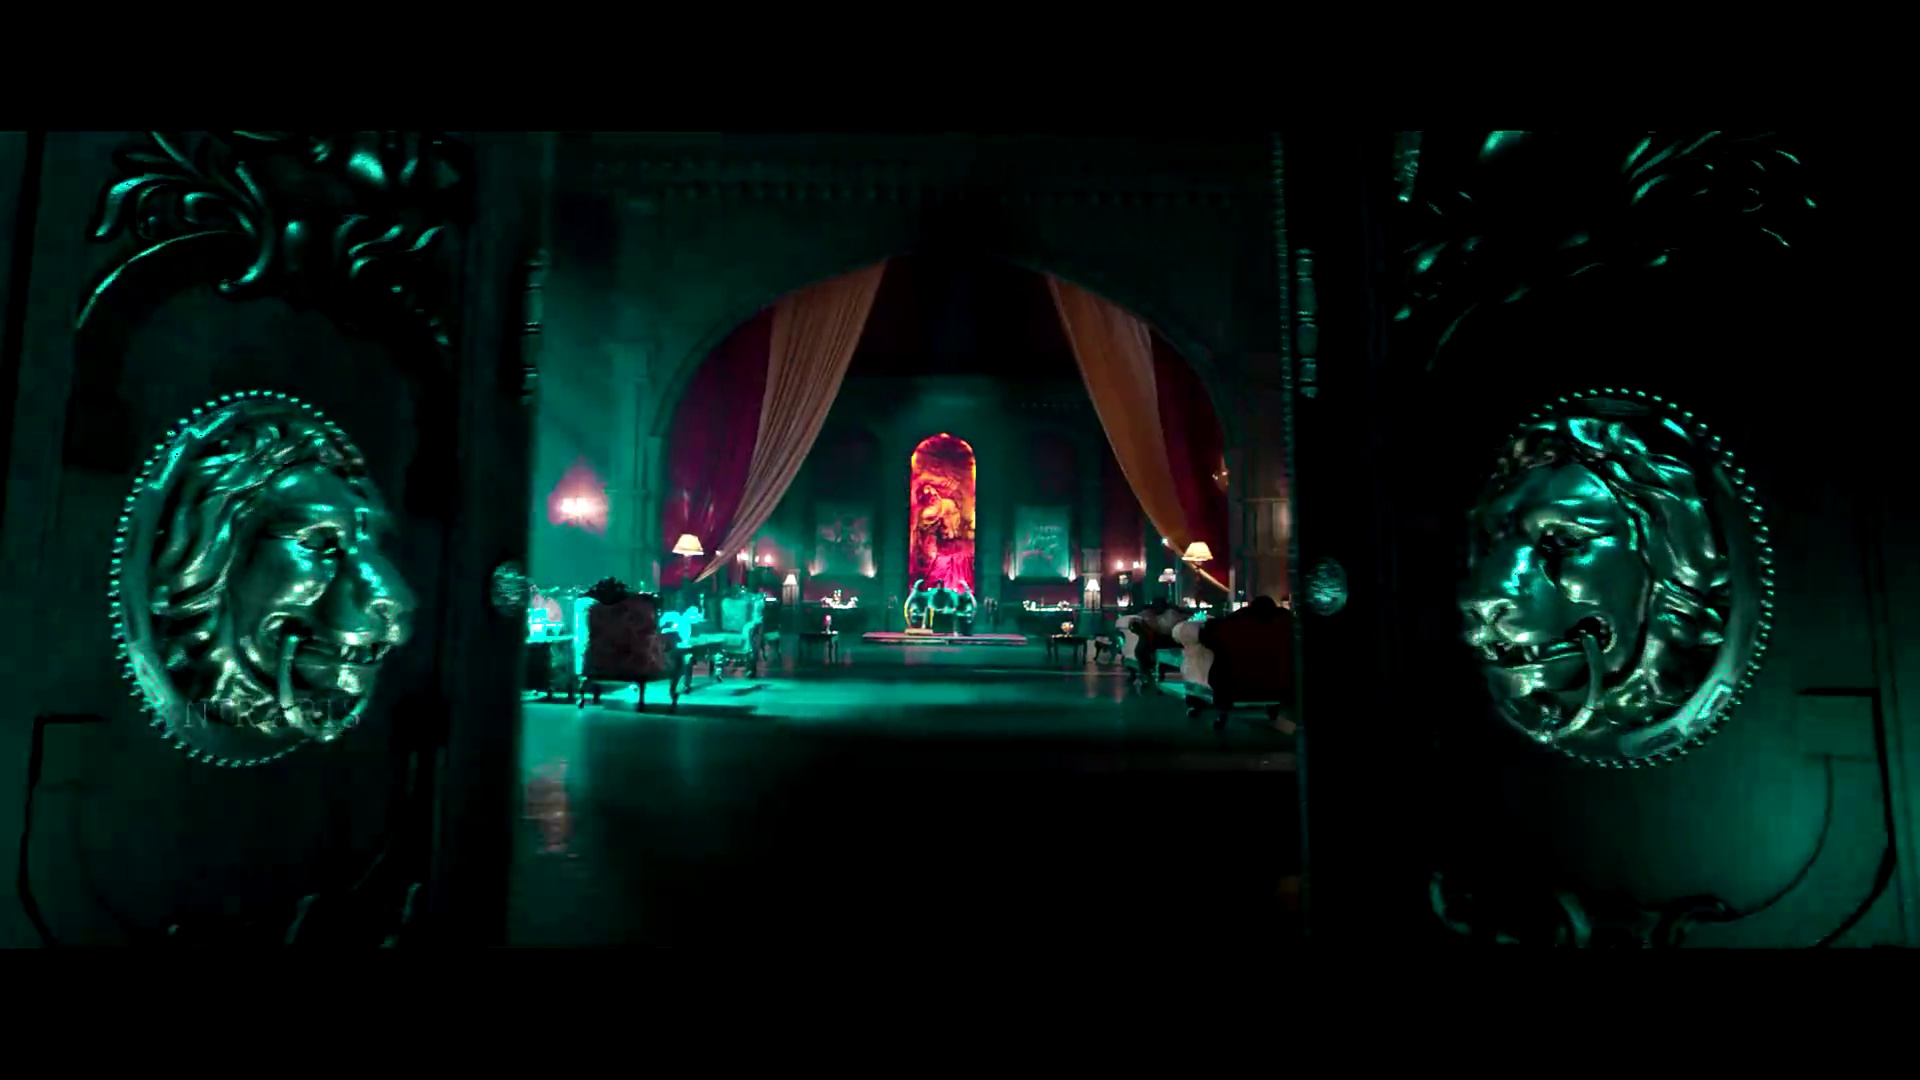

Scene cut at frame: 94


Scene cut at frame: 95


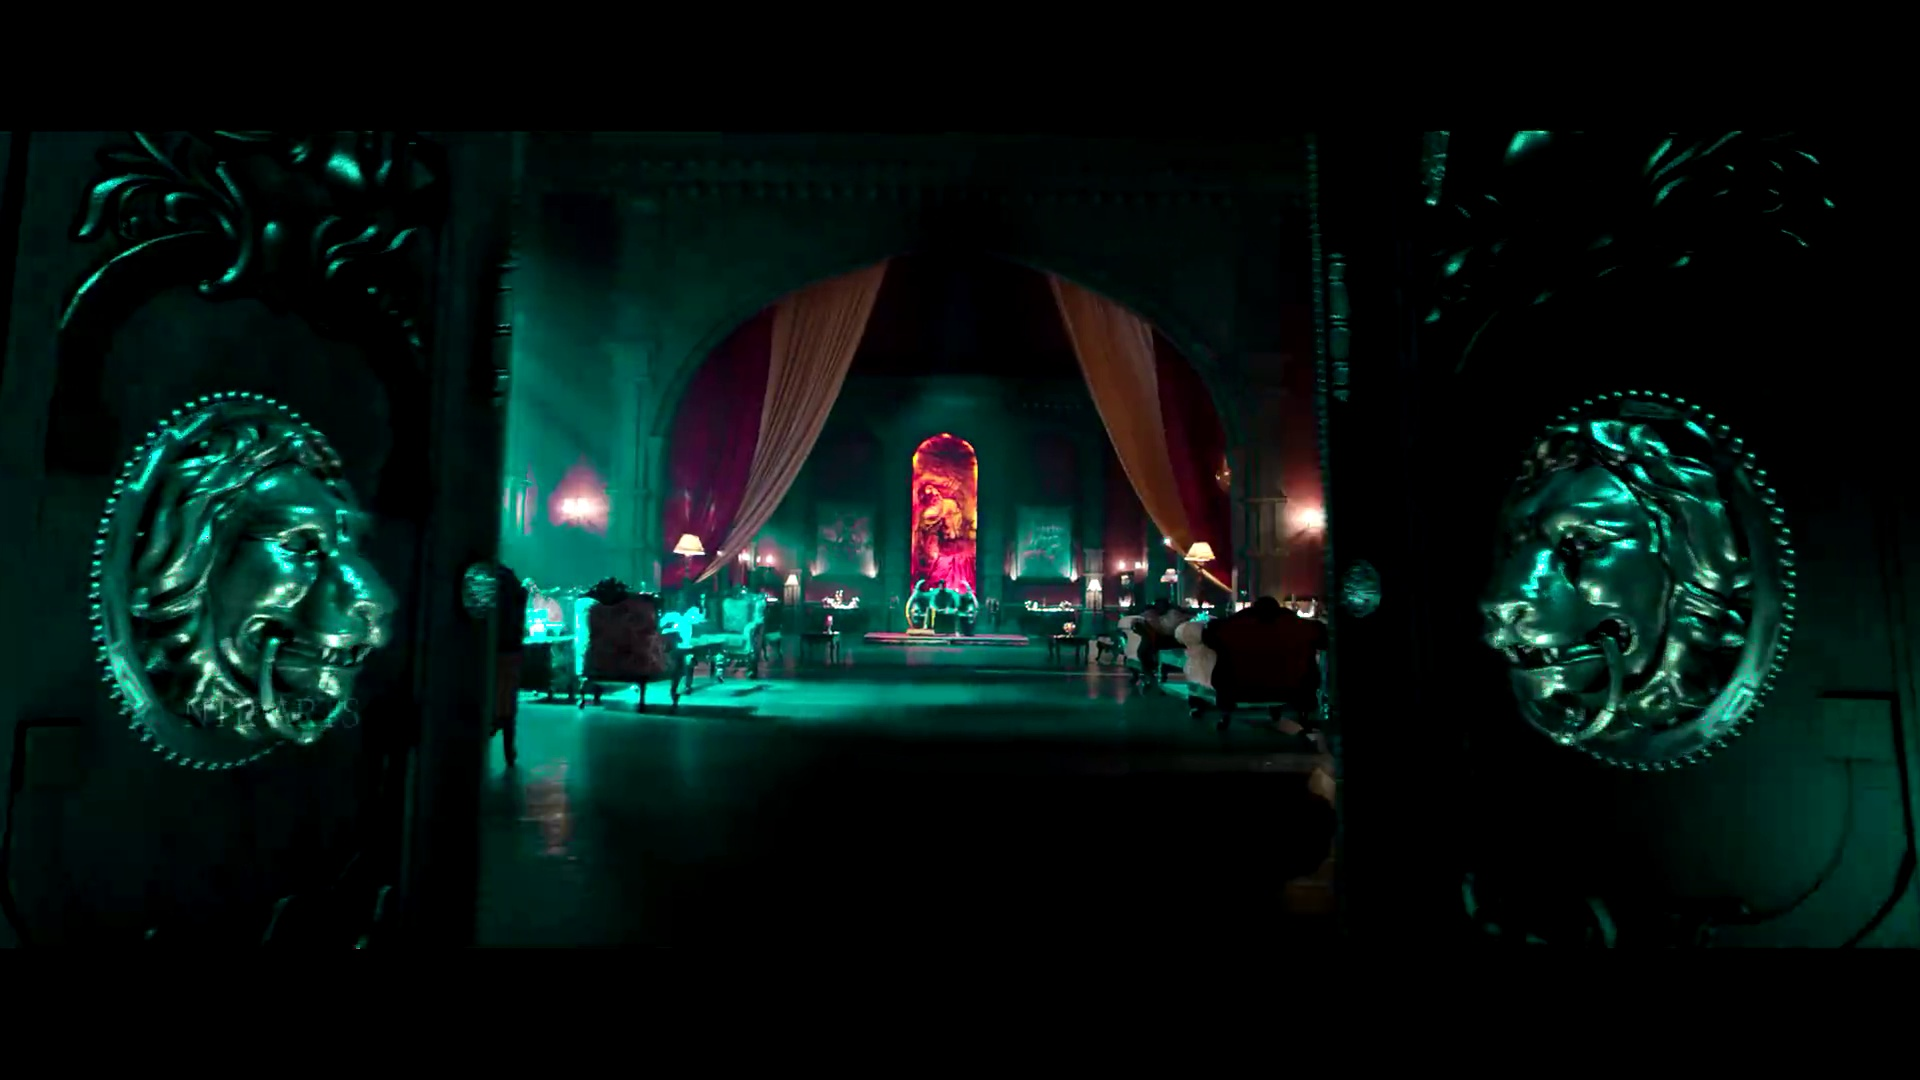

Scene cut at frame: 96


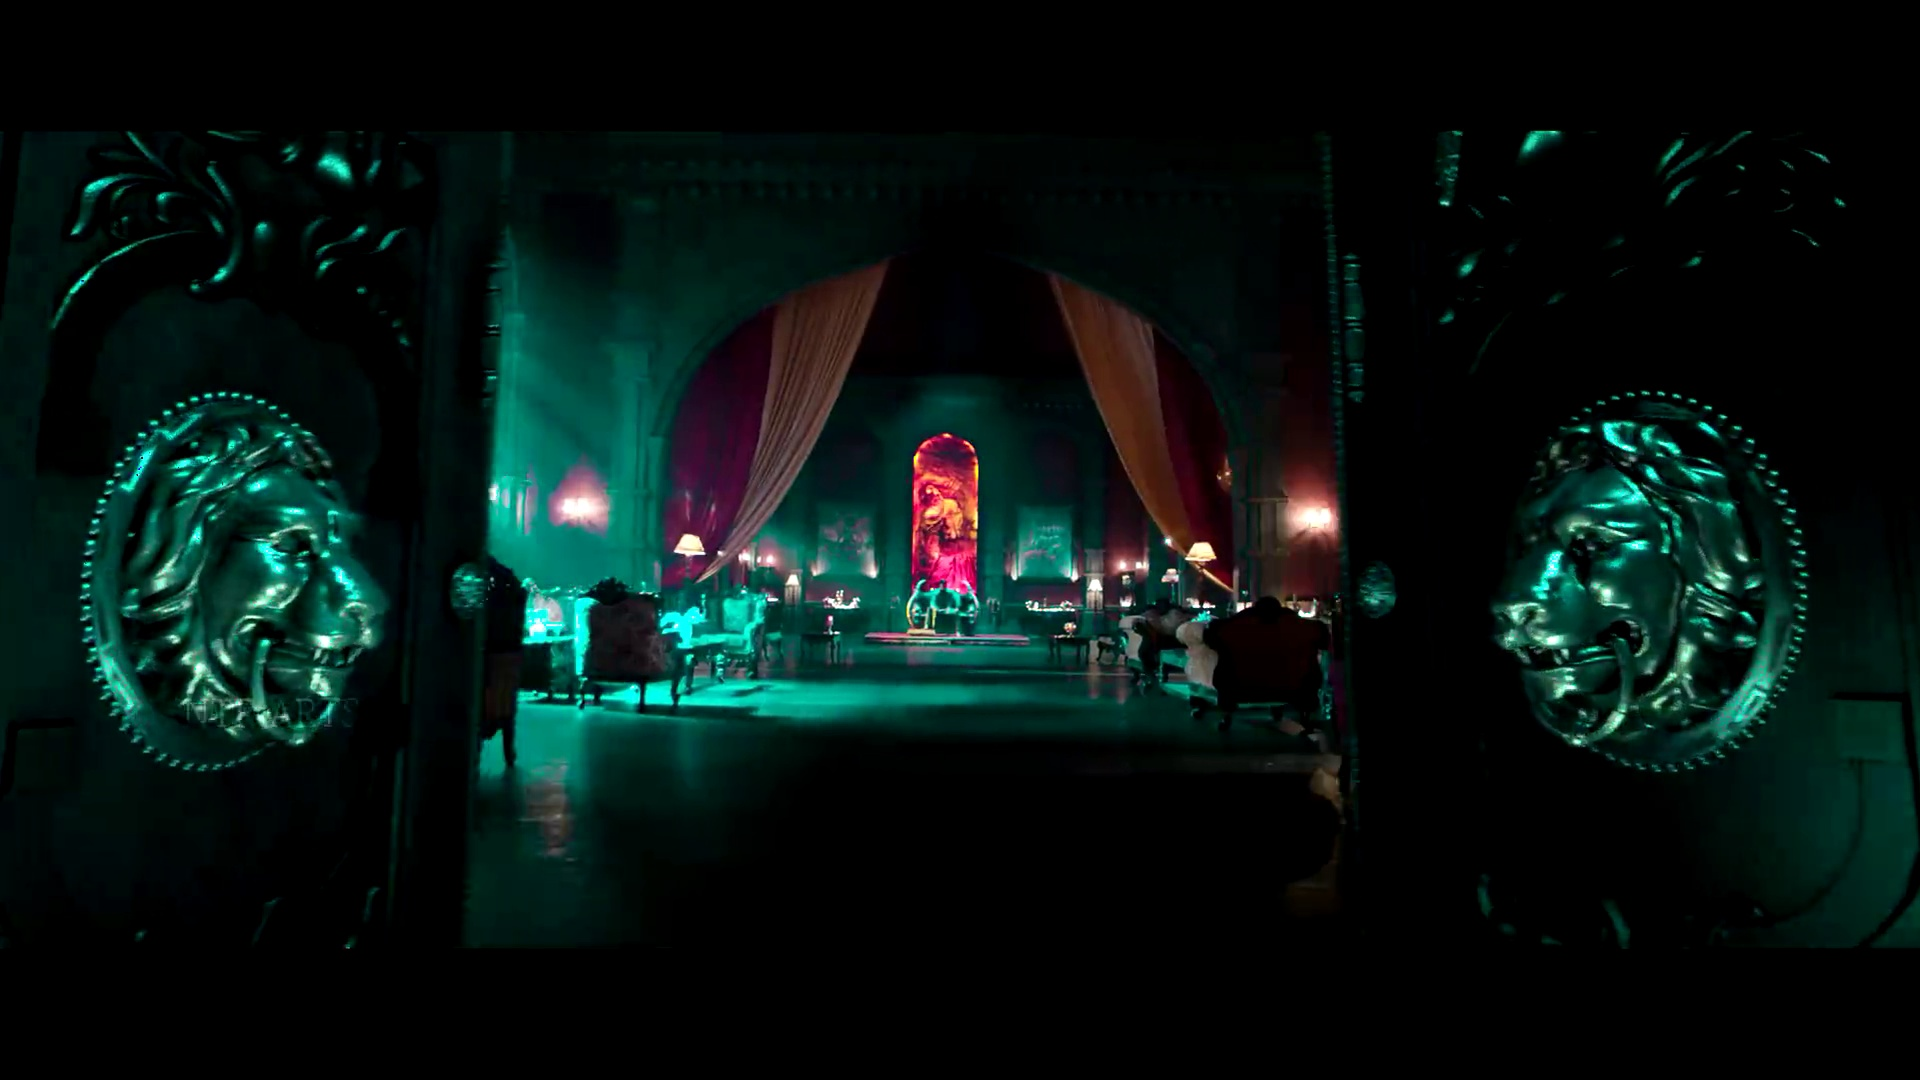

Scene cut at frame: 97


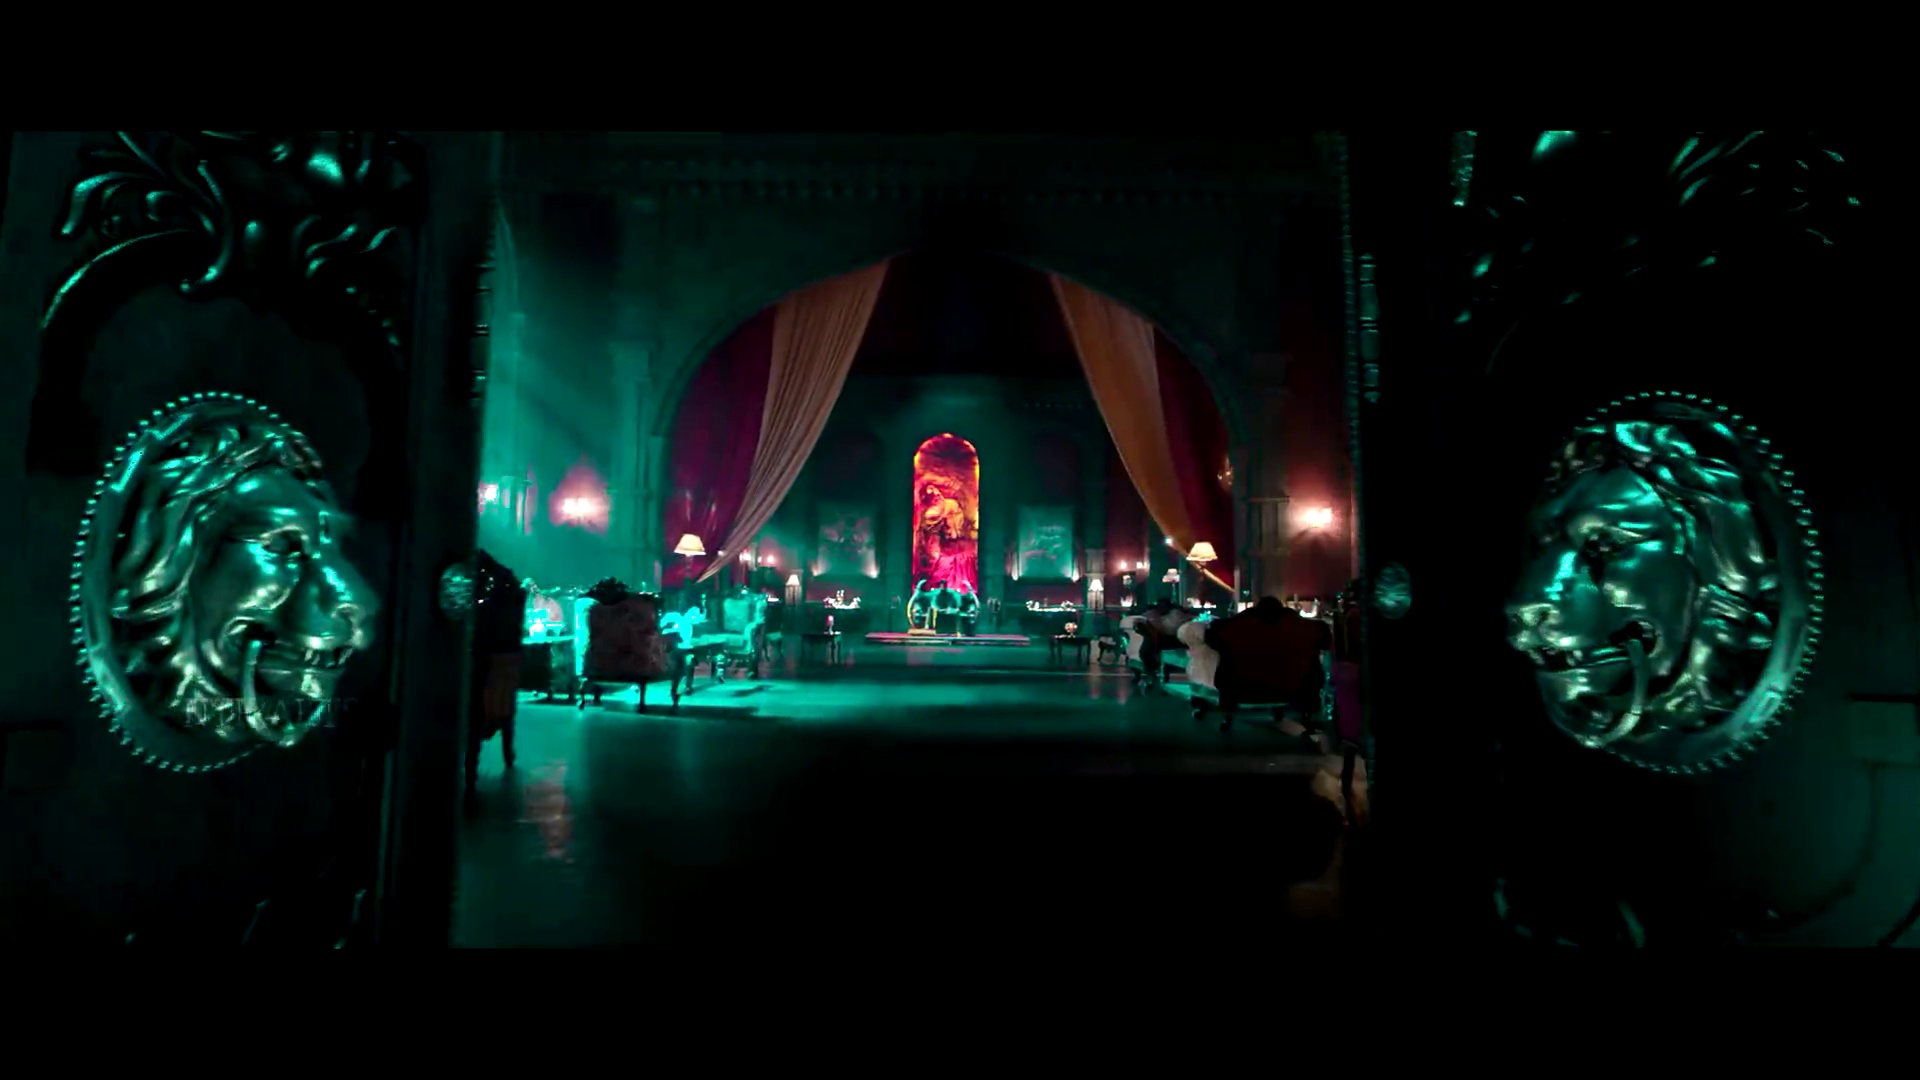

Scene cut at frame: 98


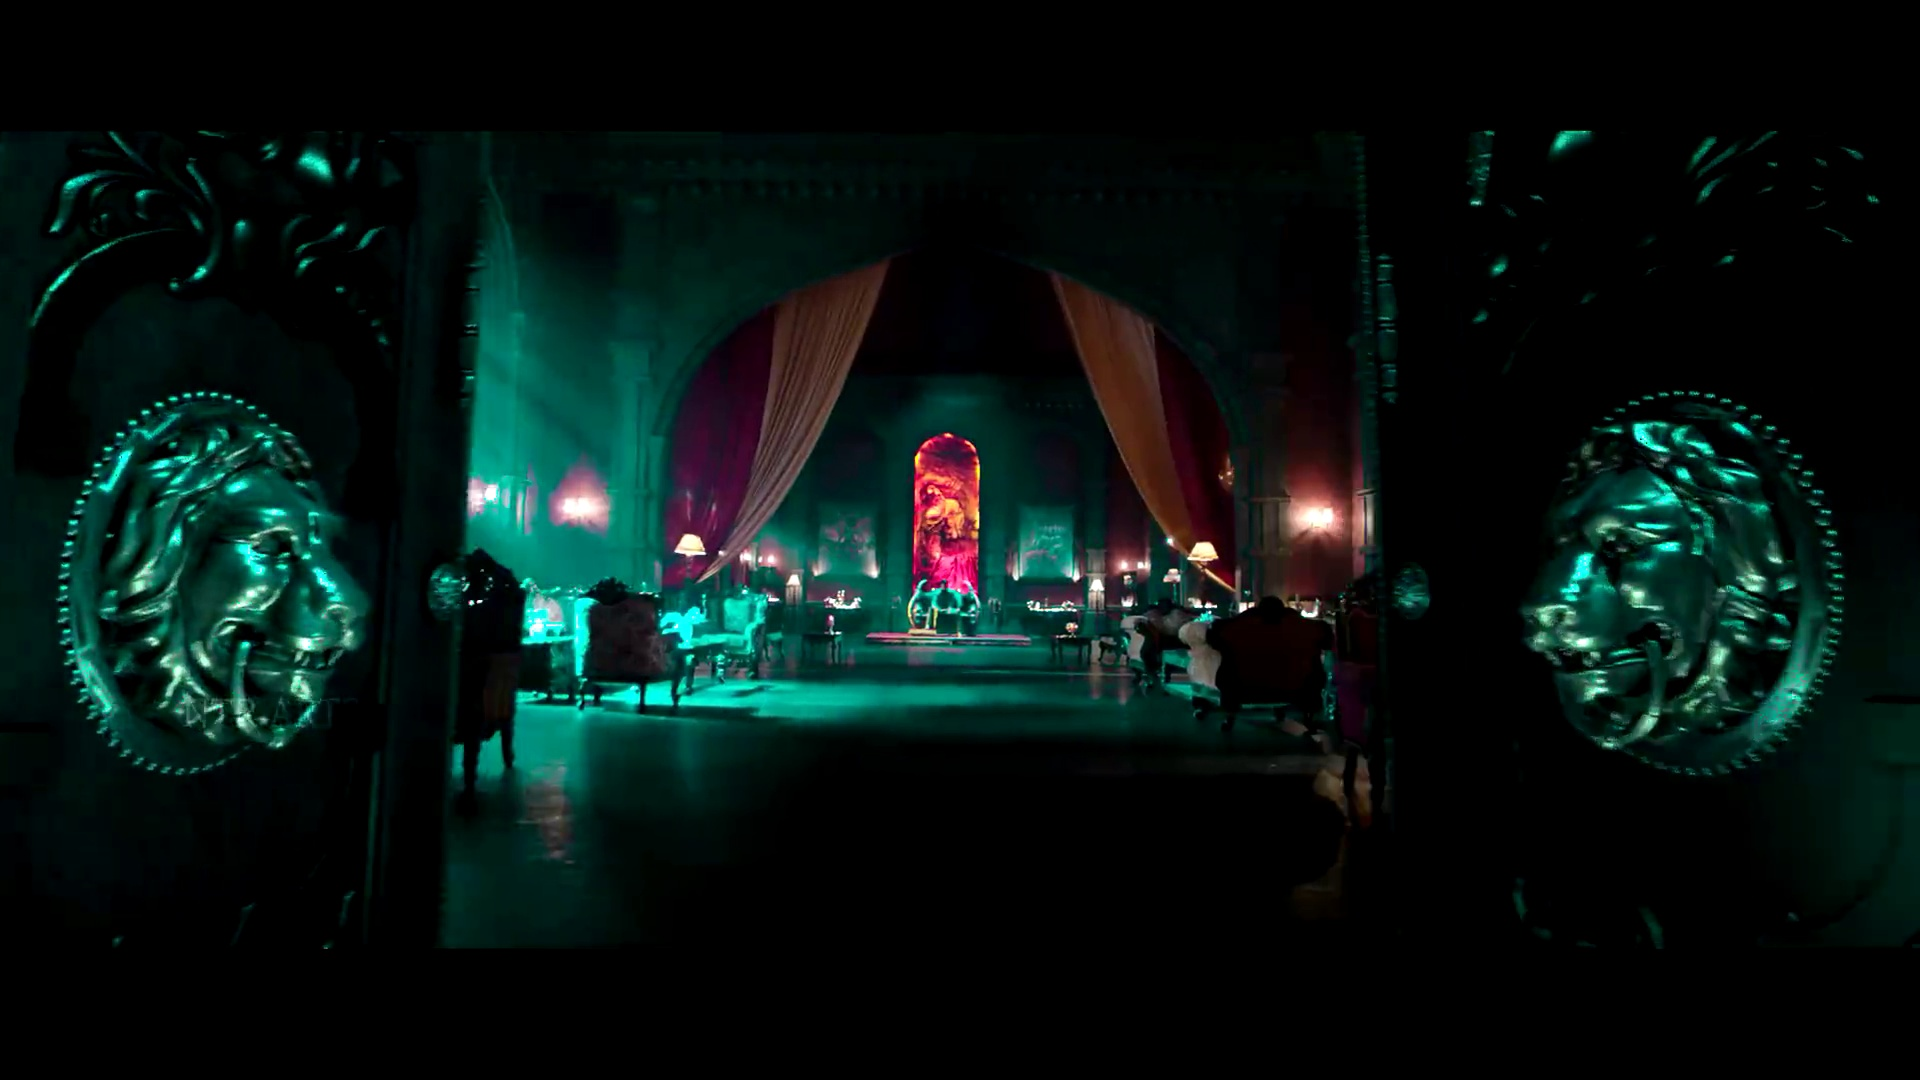

Scene cut at frame: 99


Scene cut at frame: 100


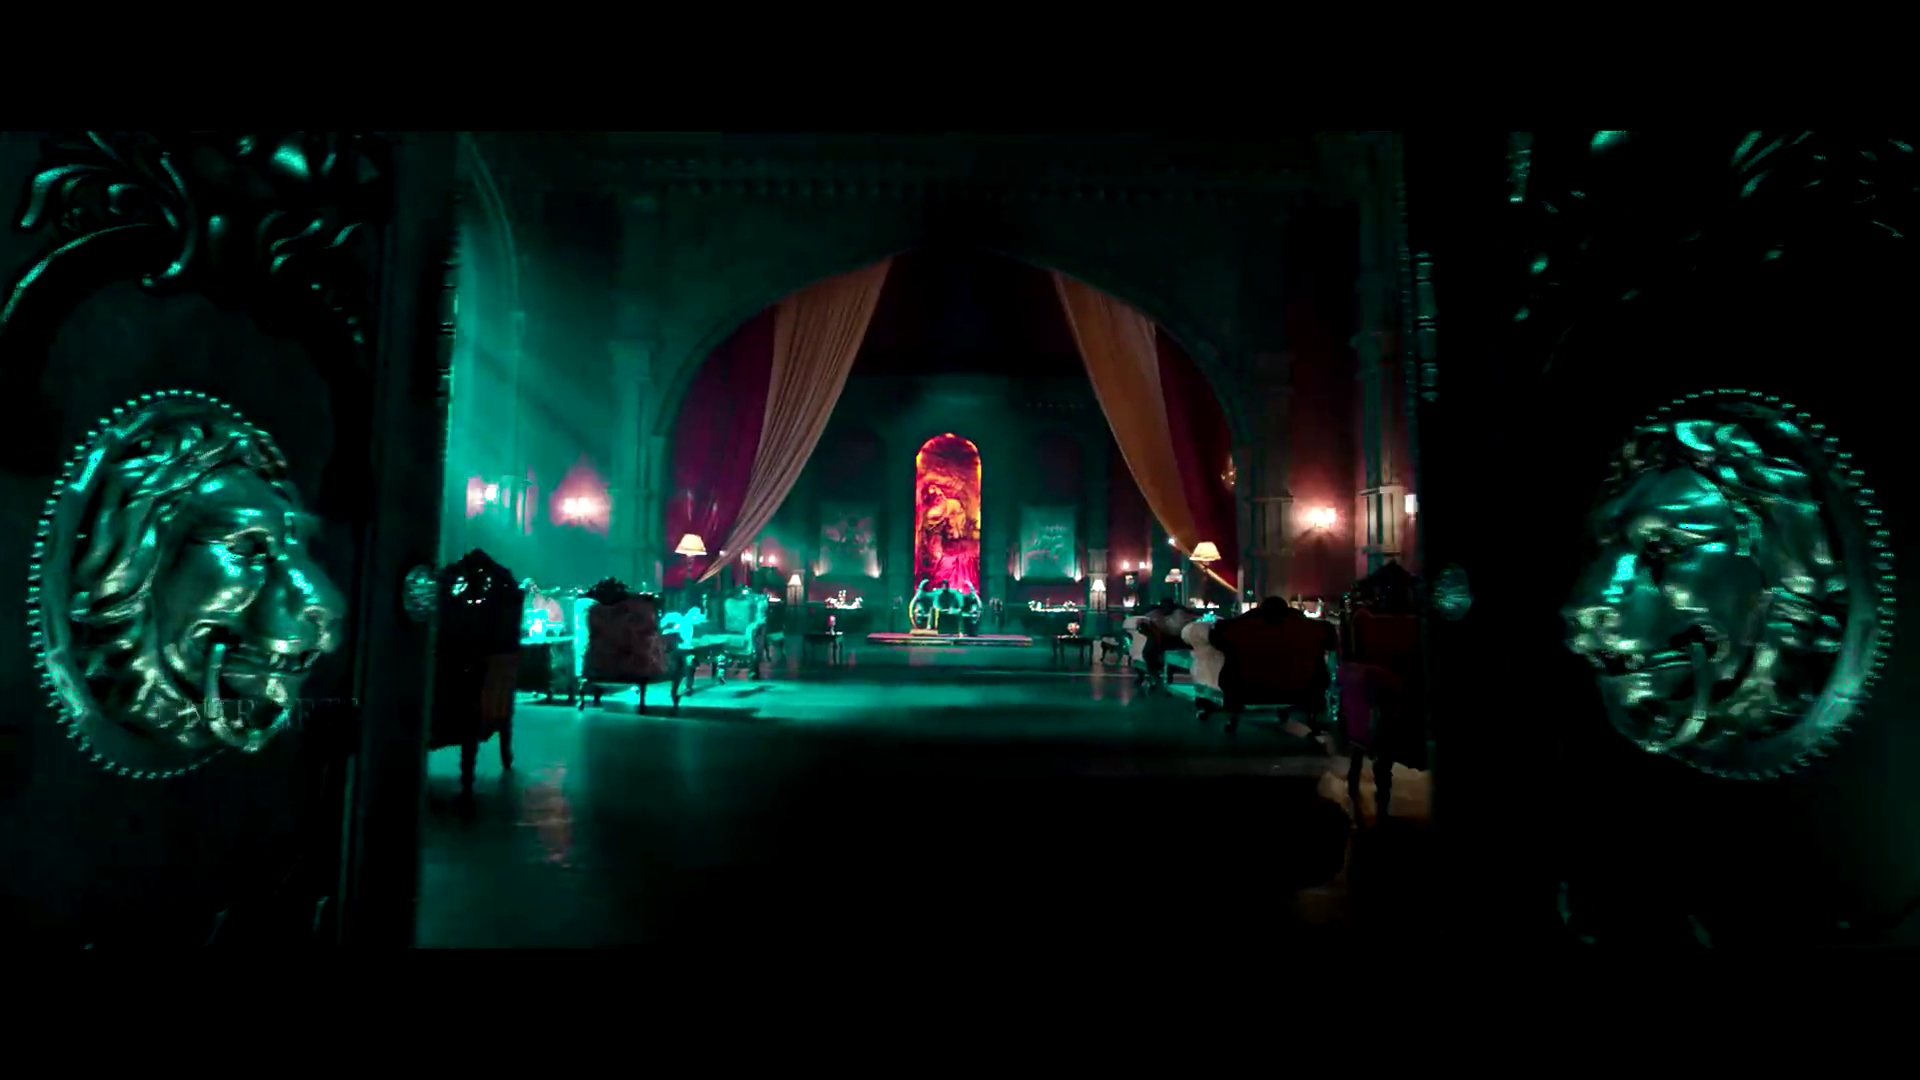

Scene cut at frame: 101


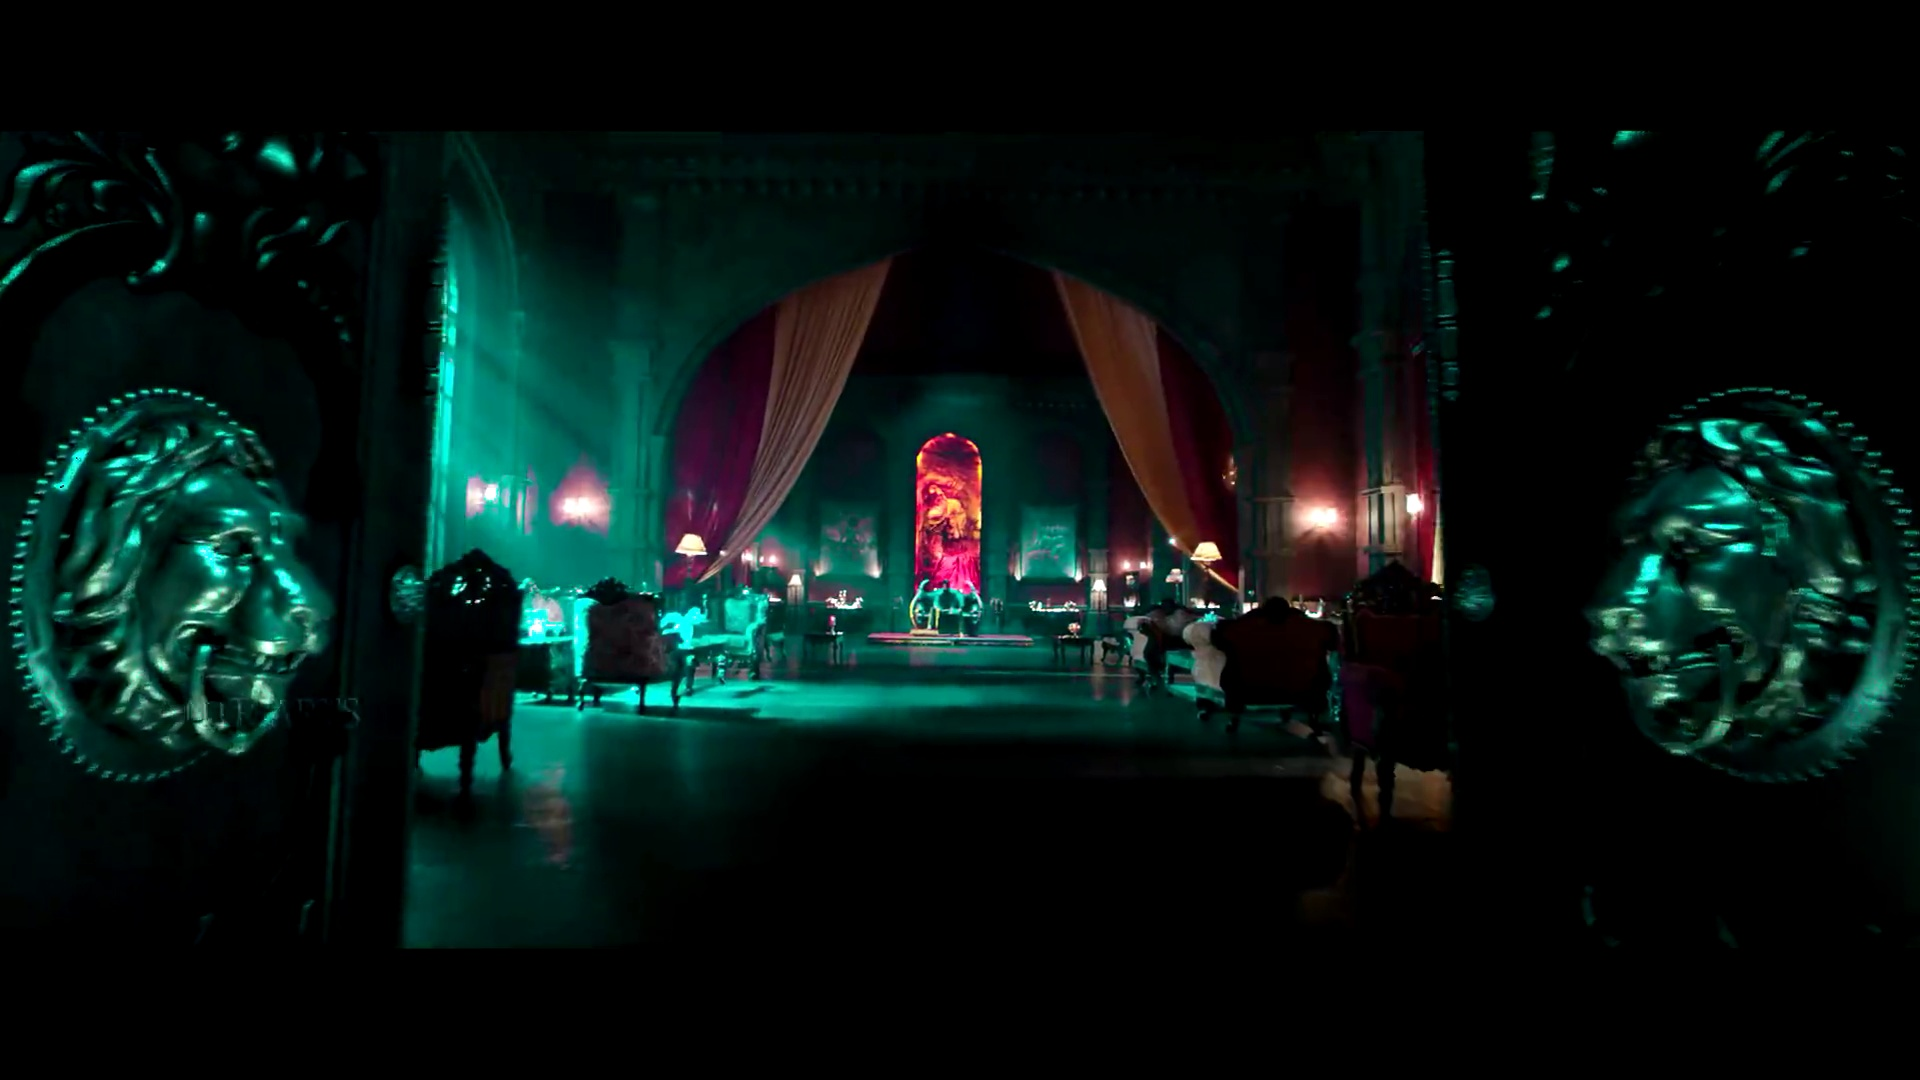

Scene cut at frame: 102


Scene cut at frame: 103


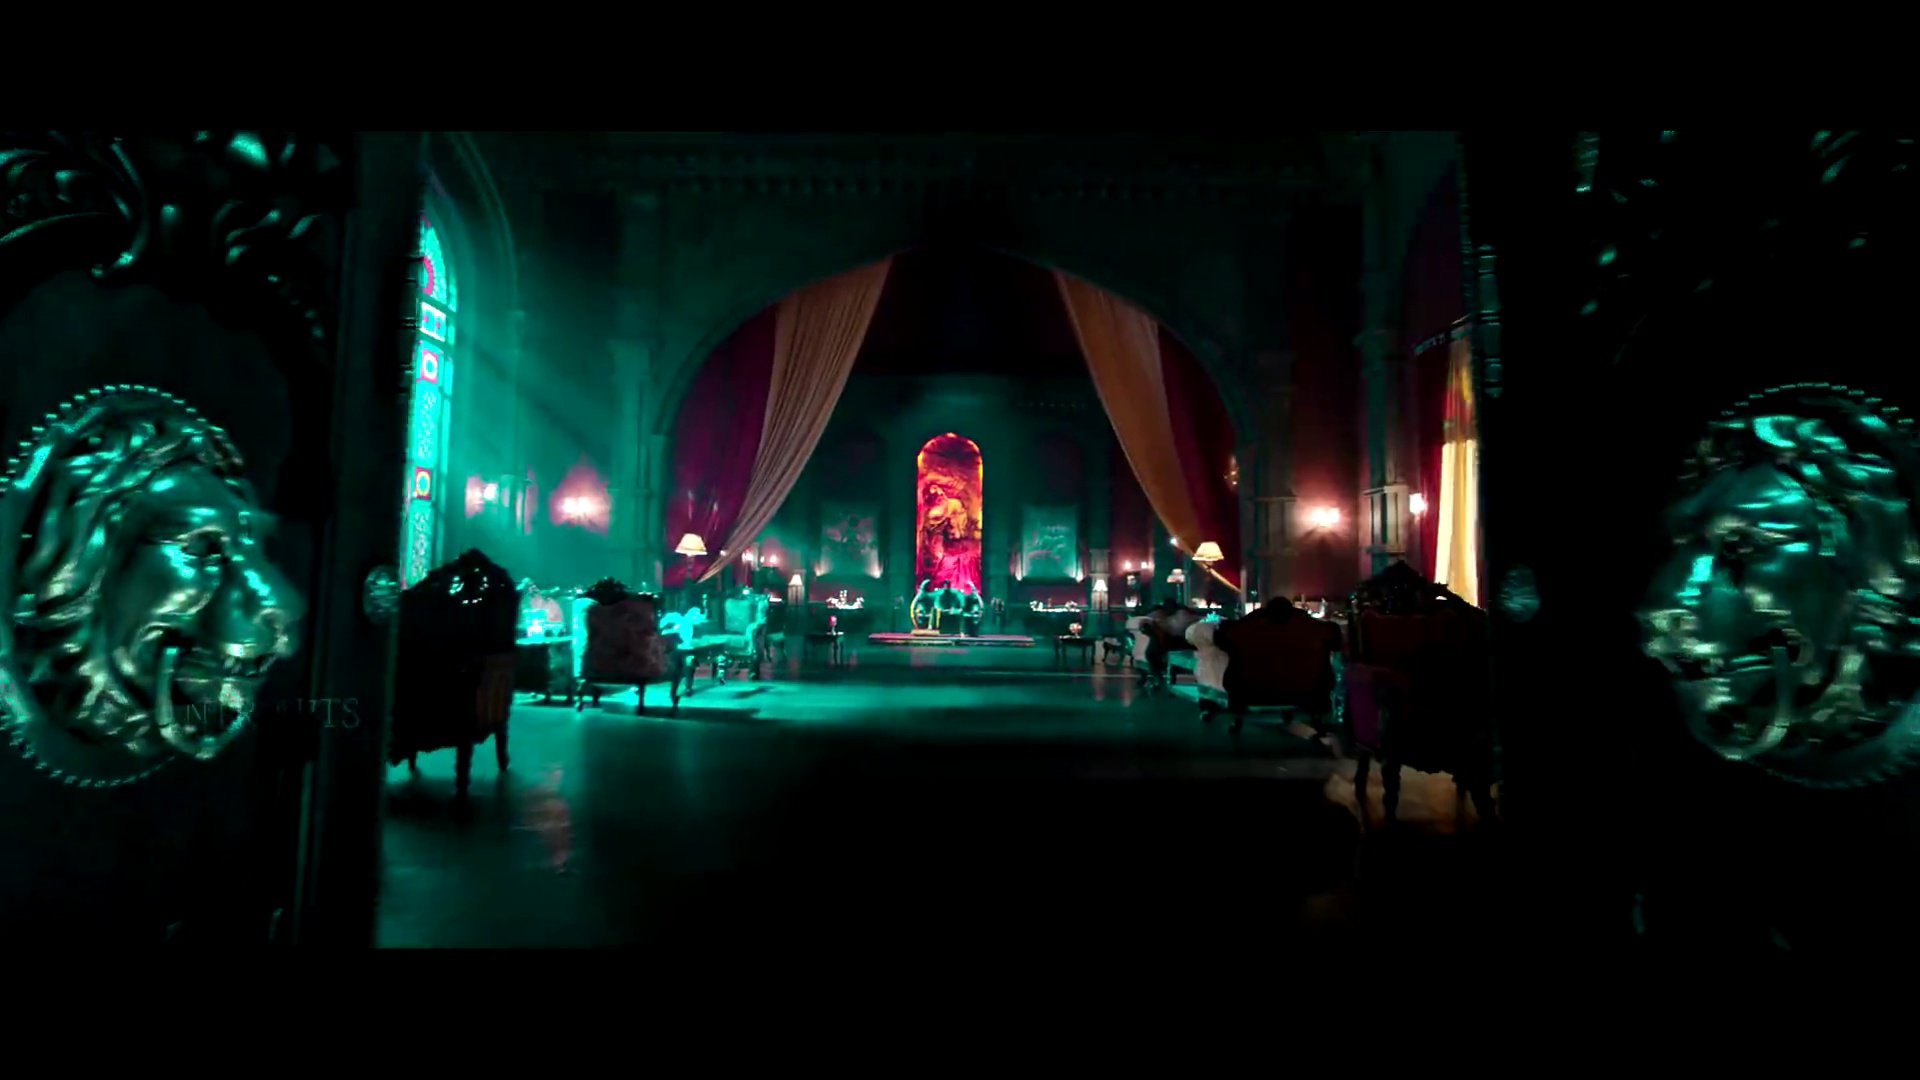

Scene cut at frame: 104


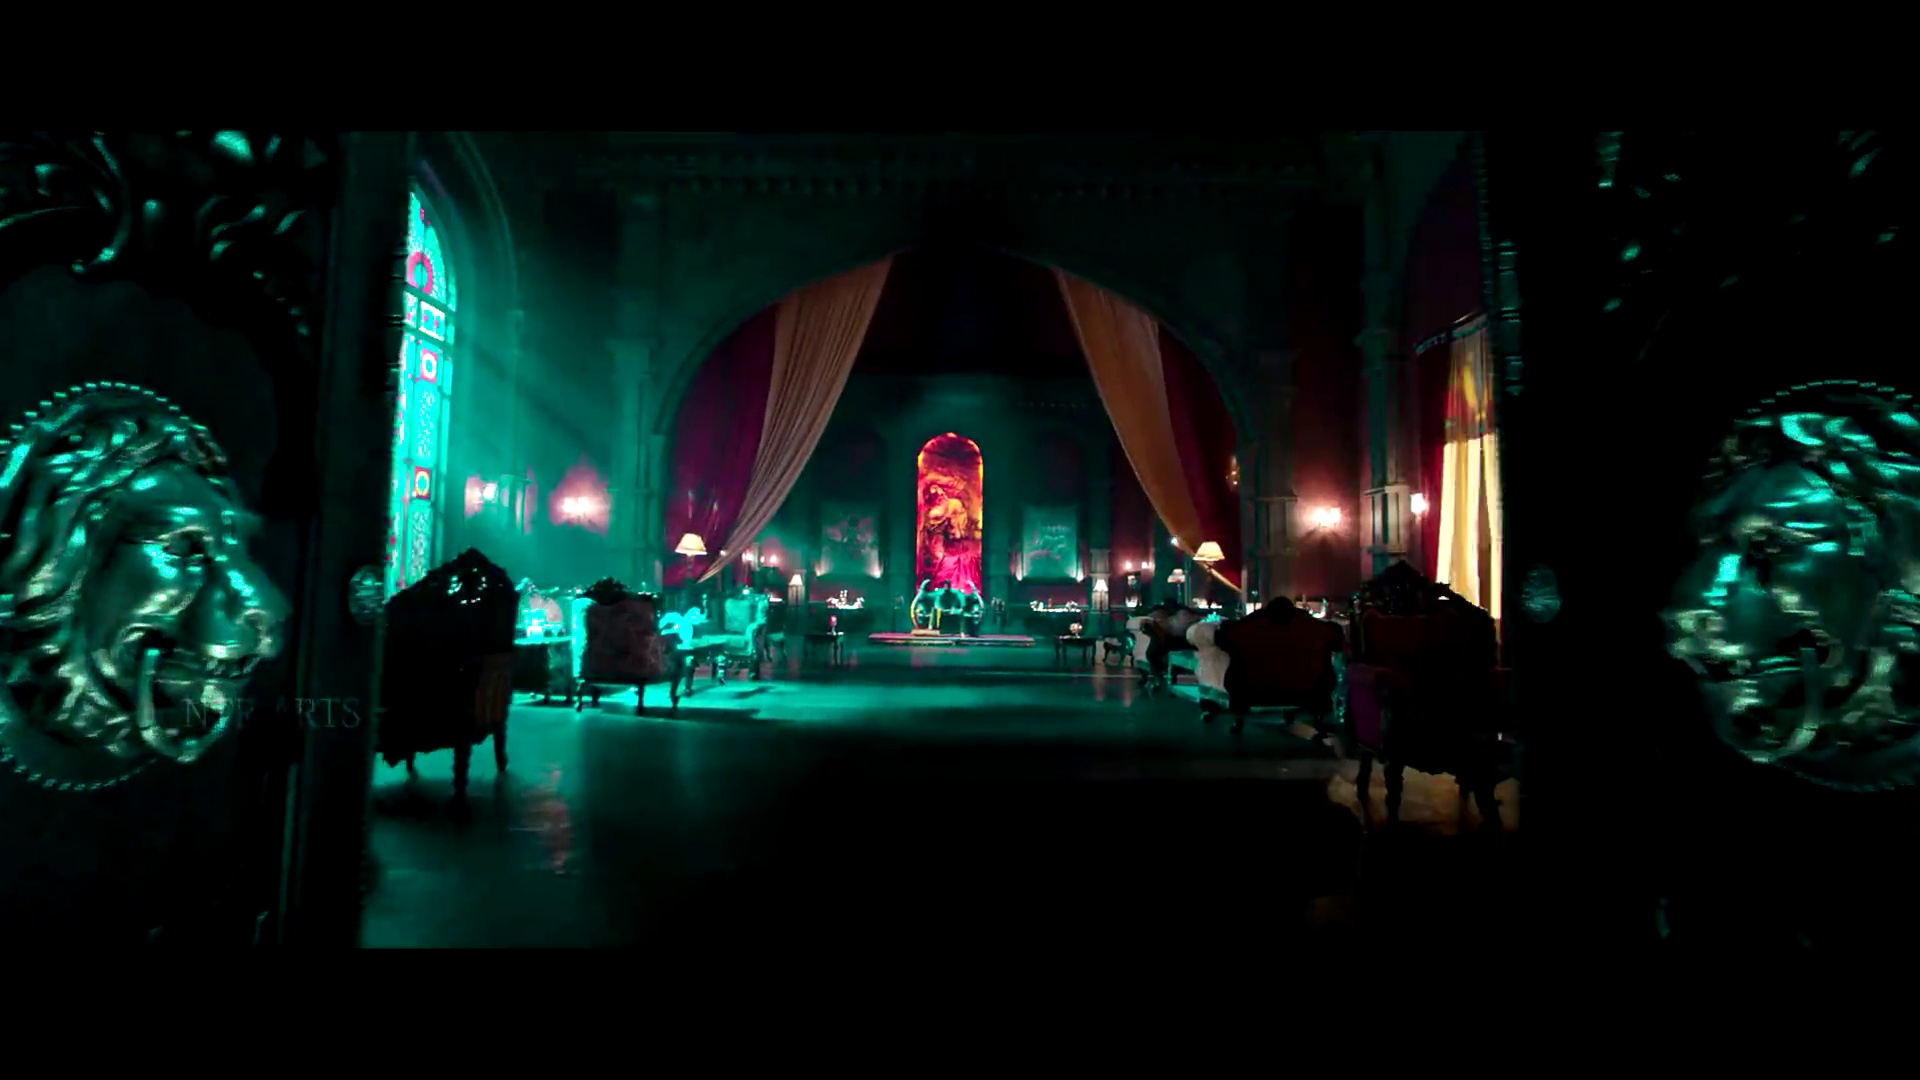

Scene cut at frame: 105
Scene cuts marked, summary created, and specific images displayed.


In [12]:
from IPython.display import Image, display

scene_cut_summary = '/content/iva1/scene_cut_summary.txt'
scene_cut_frames = []

cap = cv2.VideoCapture("videoplayback.mp4")
frame_number = 0
prev_frame = None

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    if detect_scene_cut(frame, prev_frame):
        scene_cut_filename = os.path.join(scene_cut_folder, f'scene_cut_{frame_number:04d}.jpg')
        cv2.imwrite(scene_cut_filename, frame)
        scene_cut_frames.append(frame_number)

    prev_frame = frame
    frame_number += 1

cap.release()
cv2.destroyAllWindows()


with open(scene_cut_summary, 'w') as file:
    for frame_number in scene_cut_frames:
        if 89 <= frame_number <= 105:
            scene_cut_image_path = os.path.join(scene_cut_folder, f'scene_cut_{frame_number:04d}.jpg')
            file.write(f'Scene cut at frame: {frame_number}\n')
            file.write(f'![Scene Cut](file://{scene_cut_image_path})\n')

            display(Image(filename=scene_cut_image_path))
            print(f'Scene cut at frame: {frame_number}')

print("Scene cuts marked, summary created, and specific images displayed.")


